# How to Use This Library

## Importing necessary libraries

In [1]:
import sys
import os

sys.path.append('..')

## Getting the data for this example

This example uses the data available from [here](http://www.manythings.org/anki/). Steps to obtain the data (run the following cells):
1. Download the Hindi-English parallel corpus (`hin-eng.zip`) and save it in the `raw` directory. 
2. Switch to the `raw` directory using `cd raw` and unzip `hin-eng.zip`.
3. Run the script `prepare_data.sh` using `./prepare_data.sh`.

When using your own data, make sure the bilingual corpus is split into two files, one for each language. The files must have the extension as the [ISO 639-1 code](https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes) for the language. For example, the file containing English sentences in this example is named `data.en` and the file containing the corresponding Hindi sentences is named `data.hi`. Make sure that the document on line number `n` in the target file (`data.hi` in this case) is a translation of the corresponding document on line number `n` in the source file (`data.en` in this case).

Looking at the raw data. It is neither normalized nor tokenized.

In [2]:
import pandas as pd

raw_df = pd.read_csv(os.path.join('raw', 'hin.txt'), sep='\t', header=None)
raw_df.iloc[:, 0:2].tail()

,0,1
2910,"If you go to that supermarket, you can buy mos...",उस सूपरमार्केट में तुम लगभग कोई भी रोजाने में ...
2911,The passengers who were injured in the acciden...,जिन यात्रियों को दुर्घटना मे चोट आई थी उन्हे अ...
2912,"Democracy is the worst form of government, exc...","लोकतंत्र सरकार का सबसे घिनौना रूप है, अगर बाकी..."
2913,If my boy had not been killed in the traffic a...,अगर मेरा बेटा ट्रेफ़िक हादसे में नहीं मारा गया...
2914,"When I was a kid, touching bugs didn't bother ...","जब मैं बच्चा था, मुझे कीड़ों को छूने से कोई पर..."


## Preprocessing

The `preprocess` module has two builtin preprocessing functions, one for normalizing the textual data and another for tokenizing it.

In [3]:
from indic_aug.preprocess import Preprocess

In [4]:
%%bash

rm -rf preprocessed
mkdir preprocessed

In [5]:
preproc = Preprocess(
    os.path.join('raw', 'data.en'),
    os.path.join('raw', 'data.hi')
)
preproc.preprocess(
    os.path.join('preprocessed', 'data.en'),
    os.path.join('preprocessed', 'data.hi'),
    64,                                         # Number of parallel documents to bring into memory at a time.
    funcs=['normalize', 'pretokenize']          # Functions applied in order specified.
)

100%|██████████| 46/46 [00:07<00:00,  6.34it/s]


## Building the vocabulary

In [6]:
%%bash

rm -rf vocab
mkdir vocab

In [7]:
from indic_aug.vocab import build_vocab

In [8]:
build_vocab(
    os.path.join('preprocessed', 'data.en'),
    os.path.join('preprocessed', 'data.hi'),
    2000,           # Source (en) vocab size
    2000,           # Target (hi) vocab size
    'vocab'
)

## SynonymAugmentor

This section shows how to use the `SynonymAugmentor` from the `basic` package. Other augmentors from the `basic` package can be used similarly.

In [9]:
from indic_aug.basic import SynonymAugmentor

In [10]:
synonymAugmentor = SynonymAugmentor(
    os.path.join('preprocessed', 'data.en'),
    os.path.join('preprocessed', 'data.hi'),
    0.3
)

2021-04-28 02:34:49 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | combined  |
| pos       | combined  |
| lemma     | combined  |
| depparse  | combined  |
| sentiment | sstplus   |
| ner       | ontonotes |

2021-04-28:02:34:49,885 INFO     [core.py:104] Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | combined  |
| pos       | combined  |
| lemma     | combined  |
| depparse  | combined  |
| sentiment | sstplus   |
| ner       | ontonotes |

2021-04-28 02:34:49 INFO: Use device: cpu
2021-04-28:02:34:49,895 INFO     [core.py:115] Use device: cpu
2021-04-28 02:34:49 INFO: Loading: tokenize
2021-04-28:02:34:49,932 INFO     [core.py:121] Loading: tokenize
2021-04-28 02:34:49 INFO: Loading: pos
2021-04-28:02:34:49,969 INFO     [core.py:121] Loading: pos
2021-04-28 02:34:50 INFO: Loading: lemma
2021-04-28:02:34:50,769 INFO     [core.py:121] Loading: l

In [11]:
i = 0
for augmentedPair in synonymAugmentor:
    print(augmentedPair)
    if i == 10:
        break
    else:
        i += 1

('Wow', 'वाह')
('Help', 'बचाओ')
('Jump', 'उछलो')
('Jump', 'कूदो')
('Jump', 'छलांग')
('Hello', 'नमस्ते')
('Hello', 'आदेस')
('Cheers', 'वाह - वाह')
('Cheers', 'चियर्स')
('suffer it', 'समझे कि नहीं')
('Im OK', 'मैं ठीक हूं')


## DepParseAugmentor

This section shows how to use `DepParseTree` and `DepParseAugmentor` from the `depparse` package.

In [12]:
import stanza
import graphviz

from indic_aug.depparse import DepParseTree, DepParseAugmentor

Creating the sentence in the desired form as expected by `DepParseTree`.

In [13]:
nlp = stanza.Pipeline()
sent = nlp('Jack hit the ball with the bat').sentences[0]

2021-04-28 02:35:02 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | combined  |
| pos       | combined  |
| lemma     | combined  |
| depparse  | combined  |
| sentiment | sstplus   |
| ner       | ontonotes |

2021-04-28:02:35:02,268 INFO     [core.py:104] Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | combined  |
| pos       | combined  |
| lemma     | combined  |
| depparse  | combined  |
| sentiment | sstplus   |
| ner       | ontonotes |

2021-04-28 02:35:02 INFO: Use device: cpu
2021-04-28:02:35:02,280 INFO     [core.py:115] Use device: cpu
2021-04-28 02:35:02 INFO: Loading: tokenize
2021-04-28:02:35:02,290 INFO     [core.py:121] Loading: tokenize
2021-04-28 02:35:02 INFO: Loading: pos
2021-04-28:02:35:02,314 INFO     [core.py:121] Loading: pos
2021-04-28 02:35:02 INFO: Loading: lemma
2021-04-28:02:35:02,981 INFO     [core.py:121] Loading: l

Creating the dependency parse tree and saving it as a GraphViz DOT file.

In [14]:
deptree = DepParseTree(sent)
deptree.save_tree('deptree.dot')

Plotting the graph.

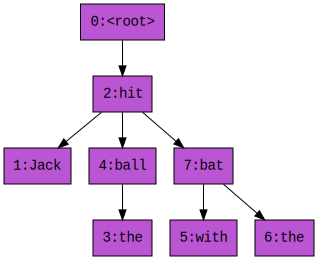

In [15]:
graphviz.Source.from_file('deptree.dot')

In [16]:
depparseAugmentor = DepParseAugmentor(
    os.path.join('preprocessed', 'data.en'),
    os.path.join('preprocessed', 'data.hi'),
    'blank',
    0.2
)

2021-04-28 02:35:08 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | combined  |
| pos       | combined  |
| lemma     | combined  |
| depparse  | combined  |
| sentiment | sstplus   |
| ner       | ontonotes |

2021-04-28:02:35:08,877 INFO     [core.py:104] Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | combined  |
| pos       | combined  |
| lemma     | combined  |
| depparse  | combined  |
| sentiment | sstplus   |
| ner       | ontonotes |

2021-04-28 02:35:08 INFO: Use device: cpu
2021-04-28:02:35:08,888 INFO     [core.py:115] Use device: cpu
2021-04-28 02:35:08 INFO: Loading: tokenize
2021-04-28:02:35:08,896 INFO     [core.py:121] Loading: tokenize
2021-04-28 02:35:08 INFO: Loading: pos
2021-04-28:02:35:08,935 INFO     [core.py:121] Loading: pos
2021-04-28 02:35:09 INFO: Loading: lemma
2021-04-28:02:35:09,537 INFO     [core.py:121] Loading: l

In [17]:
i = 0
for augmentedPair in depparseAugmentor:
    print(augmentedPair)
    if i == 100:
        break
    else:
        i += 1

('Wow !', 'वाह !')
('Help !', 'बचाओ !')
('Jump .', 'उछलो ।')
('Jump <blank>', 'कूदो ।')
('Jump .', 'छलांग ।')
('Hello <blank>', 'नमस्ते ।')
('<blank> <blank>', 'नमस्कार ।')
('Cheers <blank>', 'वाह - <blank> !')
('Cheers !', 'चियर्स <blank>')
('Got it <blank>', 'समझे कि नहीं ?')
('Im <blank> .', 'मैं ठीक हूं ।')
